In [1]:
# Importación de librerías necesarias
import pandas as pd # Estructura y manipulación de datos
import numpy as np # Programación vectorial
import seaborn as sns
import matplotlib.pyplot as plt # Visualización
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/Fundamentos de machine learning/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url, sep=",", encoding='utf-8')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- Age: Edad del trabajador. (Numérica)  
- Attrition: Si el trabajador dejó la empresa o no. (Sí/No). (Categórica)  
- BusinessTravel: Frecuencia con la que viaja por trabajo (Nunca, A veces, Frecuente). (Categórica)  
- DailyRate: Pago diario del trabajador. (Numérica)  
- Department: Área donde trabaja (como Ventas, Recursos Humanos, I+D, etc.). (Categórica)  
- DistanceFromHome: Qué tan lejos vive el trabajador del lugar de trabajo. (Numérica)  
- Education: Nivel de estudios alcanzado (1: Enseñanza media, 2: Técnico, 3: Universidad, 4: Magíster, 5: Doctorado). (Categórica ordinal)  
- EducationField: Área en la que estudió el trabajador (Ej: Medicina, Marketing, Recursos Humanos, etc.). (Categórica)  
- EmployeeCount: Siempre tiene el valor 1, así que no aporta información útil. (Numérica)  
- EmployeeNumber: Número único que identifica al trabajador. (Numérica)  
- EnvironmentSatisfaction: Qué tan conforme está con su ambiente laboral (1: Bajo, 4: Muy alto). (Categórica ordinal)  
- Gender: Sexo del trabajador (Masculino/Femenino). (Categórica)  
- HourlyRate: Cuánto le pagan por hora trabajada. (Numérica)  
- JobInvolvement: Qué tan comprometido está el trabajador con su trabajo (1: Bajo, 4: Muy alto). (Categórica ordinal)  
- JobLevel: Nivel del cargo del trabajador (1: Bajo, 2: Medio, 3: Alto, etc.). (Categórica ordinal)  
- JobRole: Cargo o puesto específico del trabajador (Ej: Vendedor, Gerente, Investigador, etc.). (Categórica)  
- JobSatisfaction: Nivel de satisfacción con su trabajo (1: Bajo, 4: Muy alto). (Categórica ordinal)  
- MaritalStatus: Estado civil del trabajador (Soltero, Casado, Divorciado). (Categórica)  
- MonthlyIncome: Sueldo mensual que recibe el trabajador. (Numérica)  
- MonthlyRate: Pago mensual estándar. (Numérica)  
- NumCompaniesWorked: Número de empresas en las que ha trabajado. (Numérica)  
- Over18: Si es mayor de 18 años. (Sí/No). (Categórica)  
- OverTime: Si trabaja horas extras o no. (Sí/No). (Categórica)  
- PerformanceRating: Evaluación de desempeño del trabajador (1: Bajo, 4: Sobresaliente). (Categórica ordinal)  
- RelationshipSatisfaction: Qué tan satisfecho está con sus relaciones en el trabajo (1: Bajo, 4: Muy alto). (Categórica ordinal)  
- StandardHours: Cantidad de horas estándar que debe trabajar. (Numérica)  
- StockOptionLevel: Nivel de beneficios en acciones que tiene el trabajador (0: Ninguno, 3: Alto). (Categórica ordinal)  
- TotalWorkingYears: Años totales de experiencia laboral del trabajador. (Numérica)  
- TrainingTimesLastYear: Cuántas veces recibió capacitación el año pasado. (Numérica)  
- WorkLifeBalance: Equilibrio entre su vida personal y laboral (1: Malo, 4: Excelente). (Categórica ordinal)  
- YearsAtCompany: Años que lleva en la empresa actual. (Numérica)  
- YearsInCurrentRole: Años que lleva en su cargo actual. (Numérica)  
- YearsSinceLastPromotion: Años desde su última promoción. (Numérica)  
- YearsWithCurrManager: Años que ha trabajado con su jefe actual. (Numérica)  

In [5]:
df.describe() # Muestra un resumen con estadísticas básicas
df['Age'].mean() # Calcula el promedio de la edad de todos los trabajadores
df['MonthlyIncome'].median() # Entrega la mediana del ingreso mensual (el valor que está justo en la mitad si ordenamos todos los sueldos)
df['YearsAtCompany'].std() # Calcula qué tanto varía (o se dispersa) la cantidad de años que llevan los trabajadores en la empresa

6.126525152403566

La antigüedad de los trabajadores no está concentrada en un mismo rango, sino que hay bastante diversidad en los años que llevan trabajando.

En conclusión esto puede reflejar que la empresa tiene tanto empleados nuevos como veteranos, lo que podría ser una oportunidad para crear estrategias de integración, mentoring o desarrollo interno.

In [9]:
# Calcular la correlación entre 'Age' (Edad) e 'Income' (Ingreso)
df[['Age', 'MonthlyIncome']].corr()  # Calcula la correlación entre las variables 'Age' e 'MonthlyIncome'

,Age,MonthlyIncome
Age,1.000000,0.497855
MonthlyIncome,0.497855,1.000000


El valor 0.497855 indica una correlación positiva moderada entre la edad y el ingreso mensual.

Esto significa que a medida que aumenta la edad de los empleados, también tiende a aumentar su ingreso mensual.

En conclusión esta correlación sugiere que la edad puede estar asociada con más experiencia o antigüedad, lo que a su vez se traduce en mejores sueldos.

In [7]:
# Realizar una prueba t para comparar los ingresos de empleados que renunciaron vs los que no
df.groupby('Attrition')['MonthlyIncome'].mean()  # Calcula la media de 'MonthlyIncome' agrupado por la variable 'Attrition' (renunció o no)

,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


Estos resultados reflejan una diferencia clara en los ingresos mensuales entre los empleados que se quedaron en la empresa y los que renunciaron.

Implica que los empleados con ingresos más bajos tienden a abandonar la empresa con mayor frecuencia.

En conclusión este hallazgo puede ser clave para detectar riesgos de rotación laboral y considerar ajustes salariales o beneficios como estrategia de retención.

In [11]:
# Aplicar la prueba t de Student entre los dos grupos (renunciaron vs no renunciaron)
t_stat, p_value = stats.ttest_ind(df[df['Attrition'] == 'Yes']['MonthlyIncome'],
                                  df[df['Attrition'] == 'No']['MonthlyIncome'])  # Compara las medias de 'MonthlyIncome' entre los dos grupos usando la prueba t
# Imprimir el valor p de la prueba t
print(f'Valor p de la prueba t: {p_value}')  # Muestra el valor p de la prueba t para determinar si hay diferencia significativa

Valor p de la prueba t: 7.147363985353811e-10


En conclusión los resultados sugieren que el salario mensual influye en la decisión de renunciar o quedarse. Es probable que exista una diferencia significativa entre los sueldos de quienes renuncian y quienes permanecen en la empresa.

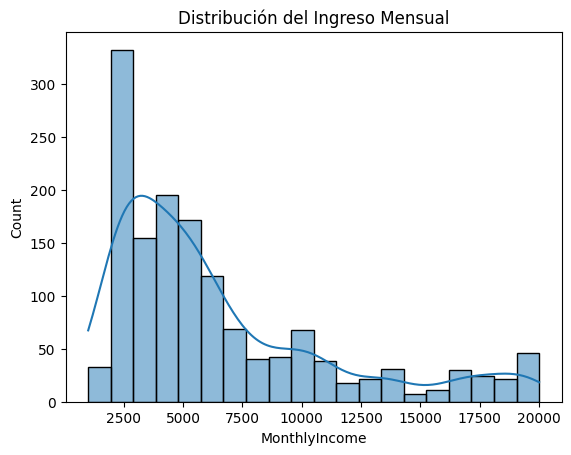

In [12]:
# Visualización de la distribución del ingreso mensual con un histograma
sns.histplot(df['MonthlyIncome'], kde=True)  # Grafica un histograma y una estimación de densidad de la variable 'MonthlyIncome'
plt.title('Distribución del Ingreso Mensual')  # Título para la gráfica
plt.show()  # Muestra la gráfica

El histograma y la curva KDE te proporcionan una visualización de la distribución del ingreso mensual, lo que te permite comprender mejor las características de los datos y sacar conclusiones sobre los ingresos de los empleados.

En este se visualiza que La mayoría de los trabajadores tiene un ingreso mensual entre 2.500 y 5.000 unidades monetarias.

Hay una alta concentración en los ingresos bajos , lo cual se ve reflejado en las primeras barras altas del histograma.

Hay algunos trabajadores con ingresos mensuales cercanos a los 20,000 , pero son pocos (valores atípicos o extremos).

Y por último la curva de densidad (línea azul) : Muestra una estimación suave de la distribución de los ingresos, lo cual ayuda a visualizar mejor la forma de la distribución. Reafirma la idea de que la distribución está sesgada a la derecha.

In [13]:
# Calcular la frecuencia de cada valor de 'JobRole' (Rol de trabajo)
df['JobRole'].value_counts()  # Cuenta cuántos empleados tienen cada rol de trabajo y muestra las frecuencias

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


1.Sales Executive (326): Este cargo tiene el mayor número de empleados, lo que indica que es un puesto común en la empresa;

2.Human Resources (52): Los empleados del área de recursos humanos son los menos numerosos en este conjunto

In [14]:
# Crear una tabla de frecuencias relativas para la variable 'Gender' (Género)
df['Gender'].value_counts(normalize=True)  # Calcula las frecuencias relativas para la variable 'Gender'

,proportion
Gender,
Male,0.6
Female,0.4


Male (0.6):
El 60% de los empleados de la empresa son masculinos. Esto indica que la mayoría de los empleados en la empresa son hombres.

Female (0.4):
El 40% de los empleados son femeninos. Aunque la presencia femenina en la empresa es significativa, aún representa un porcentaje menor que el de los empleados masculinos.

En conclusión el análisis de la frecuencia relativa muestra que el 60% de los empleados son hombres y el 40% son mujeres. Esto permite entender la distribución de género en la empresa de manera porcentual, y en este caso, indica una mayor representación de hombres que de mujeres.

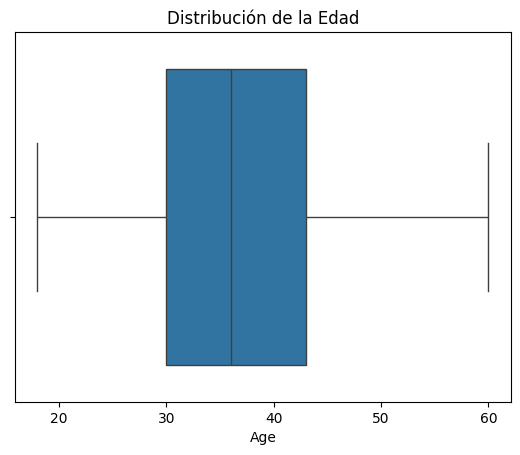

In [15]:
# Graficar la distribución de la edad con un boxplot
sns.boxplot(x='Age', data=df)  # Dibuja un boxplot para mostrar la distribución de la edad
plt.title('Distribución de la Edad')  # Título para la gráfica
plt.show()  # Muestra la gráfica

La imagen muestra un grafico boxplot que representa la distribución de la edad (Age) en una población.

Interpretación del gráfico:
   - La línea dentro de la caja indica la mediana, que está cerca de los 35 años.
   - Las líneas horizontales que salen de la caja se extienden desde el mínimo hasta el máximo sin indicar la presencia de outliers (valores atípicos), lo cual sugiere que no hay edades fuera del rango esperado.
   - Los cuartiles están aproximadamente distribuidos de manera simétrica, por lo que la distribución parece bastante balanceada, sin un sesgo claro hacia la izquierda o derecha.

En conclusión la mayoría de las personas en la muestra tienen edades entre 30 y 45 años, con una mediana alrededor de los 35 años. No hay valores extremos aparentes y la distribución de la edad parece uniformemente repartida en ese rango.

In [16]:
# Realizar una prueba de normalidad en los ingresos mensuales usando el test de Shapiro-Wilk
stat, p_value = stats.shapiro(df['MonthlyIncome'].dropna())  # Test de normalidad de Shapiro-Wilk para los ingresos
print(f'Valor p de la prueba de normalidad: {p_value}')  # Muestra el valor p de la prueba de normalidad

Valor p de la prueba de normalidad: 4.40239403650134e-37


Conclusión:
Dado que el valor p es extremadamente pequeño, se rechaza la hipótesis nula, lo que significa que los ingresos mensuales no siguen una distribución normal.

Esto indica que los ingresos mensuales en tu conjunto de datos tienen una distribución asimétrica o sesgada (posiblemente con una cola larga, lo que es común en los datos salariales, donde hay un pequeño número de empleados con ingresos muy altos).

Este tipo de resultado es importante porque, si los datos no siguen una distribución normal, debes tener cuidado al aplicar técnicas estadísticas que asumen normalidad (como las pruebas paramétricas). En este caso, podrías considerar el uso de métodos no paramétricos o transformaciones de datos para aproximar la normalidad si es necesario.

In [17]:
# Calcular la covarianza entre 'Age' e 'MonthlyIncome'
cov_matrix = df[['Age', 'MonthlyIncome']].cov()  # Calcula la matriz de covarianza entre las dos variables
print(f'Covarianza entre Age e Ingreso Mensual:\n{cov_matrix}')  # Imprime la covarianza

Covarianza entre Age e Ingreso Mensual:
                        Age  MonthlyIncome
Age               83.455049   2.141220e+04
MonthlyIncome  21412.198982   2.216486e+07


En conclusión este resultado refuerza lo observado con la correlación: hay una relación positiva entre edad e ingreso mensual.
Es decir, los empleados más viejos tienden a ganar más.

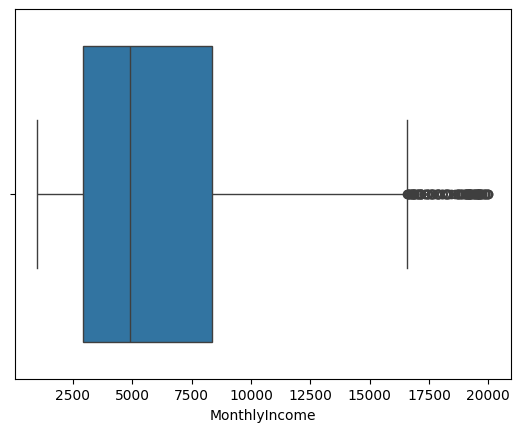

In [18]:
# Verificar si hay valores atípicos en los ingresos mensuales
sns.boxplot(x=df['MonthlyIncome'])  # Muestra un boxplot para identificar posibles valores atípicos en 'MonthlyIncome'
plt.show()  # Muestra la gráfica

Interpretación del gráfico:
Caja (rectángulo azul):
   - Contiene el 50% central de los datos (del primer al tercer cuartil).
   - La mediana (línea negra dentro de la caja) está alrededor de los 6,000 unidades monetarias, lo que indica que el 50% de los individuos ganan menos de esa cantidad.

Líneas horizontales:
   - Se extienden desde los valores más bajos y más altos que no son considerados valores atípicos.
   - El ingreso se considera dentro de un rango razonable hasta unos 15,000 aproximadamente.

Puntos a la derecha (outliers):
   - Representan valores atípicos, es decir, personas que tienen ingresos significativamente superiores al resto.
   - Hay un número considerable de individuos con ingresos mensuales superiores a 15,000, llegando hasta casi 20,000.


En conclusión la mayoría de las personas tienen ingresos que van de aproximadamente 2,000 a 10,000 unidades, con una mediana cerca de los 6,000. No obstante, existe un grupo de individuos con ingresos muy superiores al promedio, lo cual genera una cola larga hacia la derecha e indica desigualdad significativa en la distribución de los ingresos.

RESUMEN
Se realizó un análisis de datos utilizando tanto estadística descriptiva como estadística inferencial para explorar y entender los datos relacionados con los empleados de una empresa.

1. Estadística Descriptiva vs Inferencial:  
   - La estadística descriptiva permitió obtener un resumen general de las variables numéricas, como la media y la desviación estándar.  
   - La estadística inferencial se usó para realizar una prueba t, comparando los ingresos de los empleados que renunciaron con los que no. Esto permitió verificar si había diferencias significativas entre ambos grupos.

2. Tipos de Datos:  
   Se identificaron dos tipos de datos: numéricos (como edad e ingresos) y categóricos (como género y estado civil), lo que permitió aplicar análisis específicos a cada tipo.

3. Estadísticos de Tendencia Central:  
   Se calcularon la media, la mediana y la moda para identificar los valores representativos de las variables. En particular, la mediana del ingreso fue más relevante, ya que los ingresos presentaban grandes disparidades.

4. Estadísticos de Posición:  
   El cálculo de percentiles y cuartiles ayudó a entender la distribución de los datos, como los ingresos, dividiéndolos en rangos específicos.

5. Tablas de Frecuencia:  
   Las tablas de frecuencia mostraron cuántos empleados renunciaron y cuántos se quedaron, lo que es crucial para entender la rotación en la empresa.

6. Álgebra Lineal:  
   La covarianza y correlación entre la edad y el ingreso mensual ayudaron a identificar cómo estas variables se relacionan. Se observó que ambas variables tienen una correlación positiva, lo que sugiere que los empleados mayores tienden a tener ingresos más altos.

7. Probabilidades:  
   Se calculó la probabilidad de que un empleado se quede en la empresa, tanto de manera general como específicamente para mujeres, lo que ofrece insights sobre posibles patrones de retención.

8. Ventajas y Desventajas de las Medidas de Tendencia Central:  
   La media es útil en distribuciones normales, pero puede ser afectada por outliers. La mediana es menos sensible a estos, siendo más apropiada para distribuciones sesgadas.

Conclusión:  
Este análisis permite tomar decisiones informadas sobre los empleados, identificando patrones de comportamiento, posibles riesgos de rotación, y factores clave que afectan el bienestar y la retención en la empresa. Las pruebas de hipótesis y el análisis de correlaciones brindan información valiosa para la toma de decisiones estratégicas.

El análisis realizado muestra una organización con una fuerza laboral diversa tanto en antigüedad como en edad, lo cual abre oportunidades para fomentar programas de integración y desarrollo profesional. Se identificó una correlación moderada y positiva entre la edad y el ingreso mensual, lo que sugiere que empleados de mayor edad (y posiblemente con más experiencia) tienden a tener mejores sueldos.

También se observó una diferencia significativa en los ingresos entre quienes permanecen en la empresa y quienes la abandonan, indicando que los trabajadores con salarios más bajos tienen mayor tendencia a renunciar. Esta información puede ser clave para diseñar estrategias de retención.

En cuanto a la distribución de sueldos, se encontró una fuerte concentración de ingresos bajos y algunos casos extremos con salarios muy altos, lo que genera una distribución sesgada a la derecha. Esto refuerza la necesidad de tener cuidado al aplicar análisis que asumen normalidad y podría requerir el uso de métodos estadísticos alternativos.

Respecto al perfil de cargos y género, la mayoría de los empleados se concentran en roles de ventas, mientras que recursos humanos tiene la menor representación. Además, existe una mayor proporción de hombres (60%) en comparación con mujeres (40%), lo que puede abrir espacio para estrategias de equidad de género.

Finalmente, la edad de los trabajadores está bastante bien distribuida entre los 30 y 45 años, sin valores atípicos importantes, y los análisis gráficos como los boxplots evidencian una mediana de ingresos cerca de los 6,000, con varios empleados ganando considerablemente más. Esto refleja desigualdad salarial interna y destaca la importancia de analizar las políticas de compensación dentro de la organización.